<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/Week%204/Pramod_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING ESSENTIAL LIBRARIES FOR EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

READING AND VISUALISING THE DATASET

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Asteroid_Updated.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905911
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  float64
 16  extent          18 non-null      object 
 17  albedo    

CHECKING NUMBER AND LOCATION OF NAN VALUES (DATA INSUFFICIENCY)

In [5]:
dataset.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

DROPPING COLUMNS HAVING VERY LESS VALUES AVAILABLE

In [6]:
dataset = dataset.drop(["extent","rot_per","GM","BV","UB","IR","spec_B","spec_T","G"],axis=1)

DROPPING NAME COLUMN AS IT IS IRRELEVANT IN PREDICTING ASTEROID DIAMETER 

In [7]:
dataset = dataset.drop(["name"],axis=1)

In [8]:
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,3.340,N,N,939.400,0.0900,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,4.130,N,N,545.000,0.1010,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,5.330,N,N,246.596,0.2140,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,3.200,N,N,525.400,0.4228,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,6.850,N,N,106.699,0.2740,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,...,20.400,Y,Y,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905911
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,...,17.507,N,N,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,...,18.071,N,N,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,...,18.060,N,N,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [9]:
dataset.isnull().sum()

a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
albedo            703305
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

FILLING MISSING VALUES OF COLUMNS, HAVING VERY LESS NUMBER OF MISSING VAUES, WITH MEAN OF THE SAME COLUMN

In [10]:
dataset["a"].fillna(dataset["a"].mean(),inplace=True)
dataset["ad"].fillna(dataset["ad"].mean(),inplace=True)
dataset["per_y"].fillna(dataset["per_y"].mean(),inplace=True)
dataset["n"].fillna(dataset["n"].mean(),inplace=True)
dataset["per"].fillna(dataset["per"].mean(),inplace=True)
dataset["ma"].fillna(dataset["ma"].mean(),inplace=True)

In [11]:
dataset.isnull().sum()

a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
albedo            703305
moid               16442
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839714 non-null  float64
 1   e               839714 non-null  float64
 2   i               839714 non-null  float64
 3   om              839714 non-null  float64
 4   w               839714 non-null  float64
 5   q               839714 non-null  float64
 6   ad              839714 non-null  float64
 7   per_y           839714 non-null  float64
 8   data_arc        824240 non-null  float64
 9   condition_code  838847 non-null  object 
 10  n_obs_used      839714 non-null  int64  
 11  H               837025 non-null  float64
 12  neo             839708 non-null  object 
 13  pha             823272 non-null  object 
 14  diameter        137636 non-null  float64
 15  albedo          136409 non-null  float64
 16  moid            823272 non-null  float64
 17  class     

CHECKING TYPES OF ENTRIES IN COLUMN NEO AND PHA

In [13]:
y=dataset["neo"]
y.value_counts()

N    818308
Y     21400
Name: neo, dtype: int64

MAPPING NON INTEGER ENTRIES TO INTEGER VALUES SYMMETRIC ABOUT 0

In [14]:
dataset['neo'] = dataset['neo'].map( {'N': -1, 'Y':1} )

In [15]:
y=dataset["neo"]
y.value_counts()

-1.0    818308
 1.0     21400
Name: neo, dtype: int64

In [16]:
y=dataset["pha"]
y.value_counts()

N    821257
Y      2015
Name: pha, dtype: int64

In [17]:
dataset['pha'] = dataset['pha'].map( {'N': -1, 'Y':1} )

In [18]:
y=dataset["pha"]
y.value_counts()

-1.0    821257
 1.0      2015
Name: pha, dtype: int64

In [19]:
y=dataset["condition_code"]
y.value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
E         154
D           1
Name: condition_code, dtype: int64

REMOVING ROWS WITH CONDITION CODE E AND D

In [20]:
dataset=dataset[dataset['condition_code']!='E']

In [21]:
y=dataset["condition_code"]
y.value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
D           1
Name: condition_code, dtype: int64

In [22]:
dataset=dataset[dataset['condition_code']!='D']

In [23]:
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,3.340,-1.0,-1.0,939.400,0.0900,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,4.130,-1.0,-1.0,545.000,0.1010,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,5.330,-1.0,-1.0,246.596,0.2140,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,3.200,-1.0,-1.0,525.400,0.4228,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,6.850,-1.0,-1.0,106.699,0.2740,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,...,20.400,1.0,1.0,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905911
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,...,17.507,-1.0,-1.0,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,...,18.071,-1.0,-1.0,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,...,18.060,-1.0,-1.0,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 839713
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839559 non-null  float64
 1   e               839559 non-null  float64
 2   i               839559 non-null  float64
 3   om              839559 non-null  float64
 4   w               839559 non-null  float64
 5   q               839559 non-null  float64
 6   ad              839559 non-null  float64
 7   per_y           839559 non-null  float64
 8   data_arc        824085 non-null  float64
 9   condition_code  838692 non-null  object 
 10  n_obs_used      839559 non-null  int64  
 11  H               836870 non-null  float64
 12  neo             839553 non-null  float64
 13  pha             823272 non-null  float64
 14  diameter        137636 non-null  float64
 15  albedo          136409 non-null  float64
 16  moid            823272 non-null  float64
 17  class     

In [25]:
y=dataset["condition_code"]
y.value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
Name: condition_code, dtype: int64

STUDYING THE CORRELATION OF THE VARIABLES WITH EACH OTHER

In [26]:
dataset.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,n,per,ma
a,1.000000,-0.007132,-0.018973,0.000155,-0.001283,0.025003,0.058672,0.052980,0.000106,-0.000409,-0.008793,-0.026189,-0.000415,0.144736,-0.110227,0.024907,-0.005133,0.052948,0.001656
e,-0.007132,1.000000,0.132792,0.005204,0.007978,-0.115409,0.086631,0.043546,-0.149614,-0.079494,0.342410,0.498814,0.197500,-0.049133,-0.019379,-0.105112,0.201315,0.043548,-0.015434
i,-0.018973,0.132792,1.000000,-0.015800,-0.000701,0.032010,0.071985,0.040328,-0.140710,-0.071632,-0.098055,0.088954,0.036250,0.052609,-0.089775,0.040909,0.000080,0.040331,0.007044
om,0.000155,0.005204,-0.015800,1.000000,-0.132300,-0.010910,-0.002044,-0.000796,0.001744,-0.005431,0.002186,0.007088,0.002641,0.001164,0.000736,-0.011062,0.008957,-0.000796,0.000608
w,-0.001283,0.007978,-0.000701,-0.132300,1.000000,-0.003412,-0.000389,-0.000667,-0.005363,0.003743,-0.004289,0.001343,0.000020,0.002966,-0.003063,-0.003382,0.003678,-0.000667,-0.007585
q,0.025003,-0.115409,0.032010,-0.010910,-0.003412,1.000000,0.306933,0.109765,-0.028362,-0.029189,-0.436410,-0.107873,-0.036172,0.329703,-0.262726,0.999742,-0.327805,0.109765,-0.004538
ad,0.058672,0.086631,0.071985,-0.002044,-0.000389,0.306933,1.000000,0.931741,-0.021425,-0.014504,-0.124646,-0.009033,-0.002201,0.093430,-0.069225,0.307557,-0.098147,0.931741,-0.006125
per_y,0.052980,0.043546,0.040328,-0.000796,-0.000667,0.109765,0.931741,1.000000,-0.008640,-0.005054,-0.043935,-0.002565,-0.000830,0.048953,-0.019495,0.110164,-0.031431,1.000000,-0.002911
data_arc,0.000106,-0.149614,-0.140710,0.001744,-0.005363,-0.028362,-0.021425,-0.008640,1.000000,0.731487,-0.551013,-0.164473,-0.025969,0.491603,0.255920,-0.031287,-0.075126,-0.008640,-0.002682
n_obs_used,-0.000409,-0.079494,-0.071632,-0.005431,0.003743,-0.029189,-0.014504,-0.005054,0.731487,1.000000,-0.572316,-0.065878,-0.002101,0.385747,0.450589,-0.031043,-0.009502,-0.005054,-0.010964


In [27]:
y=dataset["class"]
y.value_counts()

MBA    747292
OMB     24712
IMB     17547
MCA     17341
APO     11759
AMO      8020
TJN      7383
TNO      3308
ATE      1601
CEN       486
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

MAPPING ORBIT CLASSES ACCORDING TO MAGNITUDE OF PARAMETERS

In [28]:
dataset['class'] = dataset['class'].map( {'IEO':0, 'AST':1, 'ATE':2, 'APO':3, 'AMO':4, 'IMB':5, 'MBA':6, 'MCA':7, 'OMB':8, 'PAA':9, 'HYA':10, 'TJN':11, 'CEN':12, 'TNO':13} )

In [29]:
y=dataset["class"]
y.value_counts()

6     747292
8      24712
5      17547
7      17341
3      11759
4       8020
11      7383
13      3308
2       1601
12       486
1         84
0         20
10         4
9          2
Name: class, dtype: int64

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 839713
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839559 non-null  float64
 1   e               839559 non-null  float64
 2   i               839559 non-null  float64
 3   om              839559 non-null  float64
 4   w               839559 non-null  float64
 5   q               839559 non-null  float64
 6   ad              839559 non-null  float64
 7   per_y           839559 non-null  float64
 8   data_arc        824085 non-null  float64
 9   condition_code  838692 non-null  object 
 10  n_obs_used      839559 non-null  int64  
 11  H               836870 non-null  float64
 12  neo             839553 non-null  float64
 13  pha             823272 non-null  float64
 14  diameter        137636 non-null  float64
 15  albedo          136409 non-null  float64
 16  moid            823272 non-null  float64
 17  class     

In [31]:
dataset = dataset.drop(["condition_code"],axis=1)

In [32]:
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.340,-1.0,-1.0,939.400,0.0900,1.594780,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.130,-1.0,-1.0,545.000,0.1010,1.233240,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.330,-1.0,-1.0,246.596,0.2140,1.034540,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.200,-1.0,-1.0,525.400,0.4228,1.139480,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.850,-1.0,-1.0,106.699,0.2740,1.095890,6,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,118,20.400,1.0,1.0,NaN,NaN,0.032397,3,0.208911,1723.217927,156.905911
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,15,17.507,-1.0,-1.0,NaN,NaN,0.956145,6,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,6,18.071,-1.0,-1.0,NaN,NaN,0.893896,6,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,13,18.060,-1.0,-1.0,NaN,NaN,0.680220,6,0.290018,1241.302609,15.320134


In [33]:
dataset.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
a,1.000000,-0.007132,-0.018973,0.000155,-0.001283,0.025003,0.058672,0.052980,0.000106,-0.000409,-0.008793,-0.026189,-0.000415,0.144736,-0.110227,0.024907,0.011804,-0.005133,0.052948,0.001656
e,-0.007132,1.000000,0.132792,0.005204,0.007978,-0.115409,0.086631,0.043546,-0.149614,-0.079494,0.342410,0.498814,0.197500,-0.049133,-0.019379,-0.105112,-0.204293,0.201315,0.043548,-0.015434
i,-0.018973,0.132792,1.000000,-0.015800,-0.000701,0.032010,0.071985,0.040328,-0.140710,-0.071632,-0.098055,0.088954,0.036250,0.052609,-0.089775,0.040909,0.028550,0.000080,0.040331,0.007044
om,0.000155,0.005204,-0.015800,1.000000,-0.132300,-0.010910,-0.002044,-0.000796,0.001744,-0.005431,0.002186,0.007088,0.002641,0.001164,0.000736,-0.011062,-0.005784,0.008957,-0.000796,0.000608
w,-0.001283,0.007978,-0.000701,-0.132300,1.000000,-0.003412,-0.000389,-0.000667,-0.005363,0.003743,-0.004289,0.001343,0.000020,0.002966,-0.003063,-0.003382,-0.002848,0.003678,-0.000667,-0.007585
q,0.025003,-0.115409,0.032010,-0.010910,-0.003412,1.000000,0.306933,0.109765,-0.028362,-0.029189,-0.436410,-0.107873,-0.036172,0.329703,-0.262726,0.999742,0.598364,-0.327805,0.109765,-0.004538
ad,0.058672,0.086631,0.071985,-0.002044,-0.000389,0.306933,1.000000,0.931741,-0.021425,-0.014504,-0.124646,-0.009033,-0.002201,0.093430,-0.069225,0.307557,0.203049,-0.098147,0.931741,-0.006125
per_y,0.052980,0.043546,0.040328,-0.000796,-0.000667,0.109765,0.931741,1.000000,-0.008640,-0.005054,-0.043935,-0.002565,-0.000830,0.048953,-0.019495,0.110164,0.077530,-0.031431,1.000000,-0.002911
data_arc,0.000106,-0.149614,-0.140710,0.001744,-0.005363,-0.028362,-0.021425,-0.008640,1.000000,0.731487,-0.551013,-0.164473,-0.025969,0.491603,0.255920,-0.031287,0.048783,-0.075126,-0.008640,-0.002682
n_obs_used,-0.000409,-0.079494,-0.071632,-0.005431,0.003743,-0.029189,-0.014504,-0.005054,0.731487,1.000000,-0.572316,-0.065878,-0.002101,0.385747,0.450589,-0.031043,0.007097,-0.009502,-0.005054,-0.010964


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 839713
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           839559 non-null  float64
 1   e           839559 non-null  float64
 2   i           839559 non-null  float64
 3   om          839559 non-null  float64
 4   w           839559 non-null  float64
 5   q           839559 non-null  float64
 6   ad          839559 non-null  float64
 7   per_y       839559 non-null  float64
 8   data_arc    824085 non-null  float64
 9   n_obs_used  839559 non-null  int64  
 10  H           836870 non-null  float64
 11  neo         839553 non-null  float64
 12  pha         823272 non-null  float64
 13  diameter    137636 non-null  float64
 14  albedo      136409 non-null  float64
 15  moid        823272 non-null  float64
 16  class       839559 non-null  int64  
 17  n           839559 non-null  float64
 18  per         839559 non-null  float64
 19  ma

In [35]:
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc       15474
n_obs_used         0
H               2689
neo                6
pha            16287
diameter      701923
albedo        703150
moid           16287
class              0
n                  0
per                0
ma                 0
dtype: int64

FILLING MISSING VALUES OF COLUMNS WITH THE CORRESPONDING VALUES FOR THE COLUMN WHICH HAS HIGHEST CORRELATION COEFF WITH IT

In [36]:
dataset["data_arc"].fillna(dataset.groupby("n_obs_used")["data_arc"].transform("mean"),inplace=True)

In [37]:
dataset["moid"].fillna(dataset.groupby("q")["moid"].transform("mean"),inplace=True)

In [38]:
dataset["neo"].fillna(dataset["neo"].mean(),inplace=True)

In [39]:
dataset["H"].fillna(dataset.groupby("n")["H"].transform("mean"),inplace=True)

In [40]:
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H               2682
neo                0
pha            16287
diameter      701923
albedo        703150
moid           16275
class              0
n                  0
per                0
ma                 0
dtype: int64

In [41]:
dataset["pha"].fillna(dataset["pha"].mode(),inplace=True)

In [42]:
dataset["moid"].fillna(dataset["moid"].mean(),inplace=True)

In [43]:
dataset["H"].fillna(dataset["H"].mean(),inplace=True)

In [44]:
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H                  0
neo                0
pha            16287
diameter      701923
albedo        703150
moid               0
class              0
n                  0
per                0
ma                 0
dtype: int64

In [45]:
y=dataset["pha"]
y.value_counts()

-1.0    821257
 1.0      2015
Name: pha, dtype: int64

In [46]:
dataset["pha"]=dataset["pha"].fillna(-1)

In [47]:
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H                  0
neo                0
pha                0
diameter      701923
albedo        703150
moid               0
class              0
n                  0
per                0
ma                 0
dtype: int64

DROPPING ROWS WITH MISSING DIAMETER VALUES

In [48]:
dataset=dataset.dropna()

In [49]:
dataset.isnull().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
neo           0
pha           0
diameter      0
albedo        0
moid          0
class         0
n             0
per           0
ma            0
dtype: int64

In [50]:
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,-1.0,-1.0,939.400,0.0900,1.594780,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,-1.0,-1.0,545.000,0.1010,1.233240,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,-1.0,-1.0,246.596,0.2140,1.034540,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,-1.0,-1.0,525.400,0.4228,1.139480,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,-1.0,-1.0,106.699,0.2740,1.095890,6,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,47,18.20,-1.0,-1.0,1.077,0.1160,0.854315,6,0.175794,2047.852953,195.737632
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,50,16.20,-1.0,-1.0,3.793,0.0210,1.663010,6,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,33,17.30,-1.0,-1.0,2.696,0.0610,1.367330,6,0.242270,1485.943371,145.319581
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,27,17.20,-1.0,-1.0,3.271,0.0720,1.166840,6,0.184914,1946.853973,175.708508


STUDYING VARIATION OF DIAMETER WITH OTHER VARIABLES USING SEABORN AND MATPLOTLIB

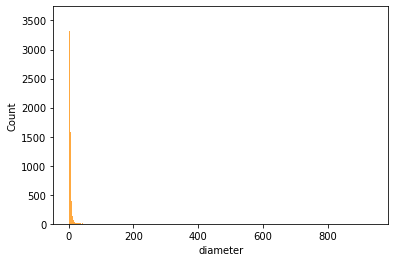

In [51]:
sns.histplot(dataset["diameter"],color='darkorange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


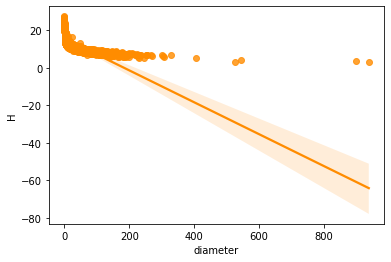

In [52]:
sns.regplot(dataset['diameter'],dataset['H'],color='darkorange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


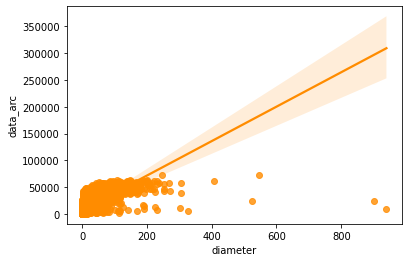

In [53]:
sns.regplot(dataset['diameter'],dataset['data_arc'],color='darkorange')

PLOTTING COLUMN DATA DENSITIES TO SEE RANGE AND PREDICT IF THE COLUMN HAS OUTLIERS 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


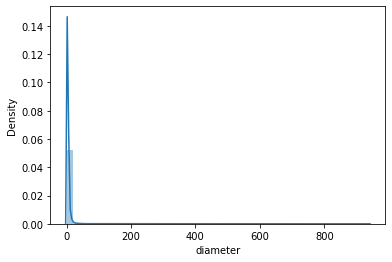

In [54]:
sns.distplot(dataset['diameter'].dropna())

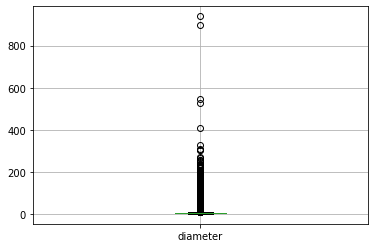

In [55]:
figure=dataset.boxplot(column="diameter")

In [56]:
dataset['diameter'].describe()

count    136406.000000
mean          5.505299
std           9.422372
min           0.008000
25%           2.780000
50%           3.970000
75%           5.764000
max         939.400000
Name: diameter, dtype: float64

IT IS A RIGHT SKEWED DATA, SO WE WILL USE IQR

FINDING VALUES ABOVE/BELOW WHICH OUTLIERS WILL LIE AND HANDELING THEM

In [57]:
IQR=dataset.diameter.quantile(0.75)-dataset.diameter.quantile(0.25)

In [58]:
lower_bridge=dataset['diameter'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['diameter'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.696000000000001
10.240000000000002


(None, None)

In [59]:
lower_bridge=dataset['diameter'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['diameter'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-6.172000000000002
14.716000000000001


(None, None)

In [60]:
upper_bridge=dataset['diameter'].quantile(0.9)+(IQR*3)
print(upper_bridge)

17.6015


In [61]:
upper_bridge=dataset['diameter'].quantile(0.95)
print(upper_bridge)

12.13675


In [62]:
upper_bridge=dataset['diameter'].quantile(0.95)+(IQR*3)
print(upper_bridge)

21.08875


In [63]:
upper_bridge=dataset['diameter'].quantile(0.99)+(IQR*3)
print(upper_bridge)

40.90720000000066


OUTLIERS HANDLED

In [64]:
dataset=dataset[dataset['diameter']<=50]

In [65]:
dataset['diameter'].describe()

count    135645.000000
mean          4.990452
std           4.158836
min           0.008000
25%           2.774000
50%           3.956000
75%           5.720000
max          49.990000
Name: diameter, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


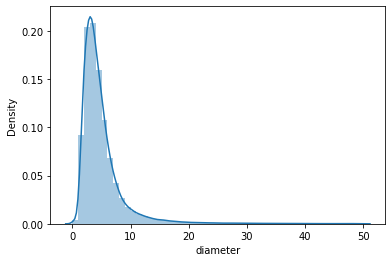

In [66]:
sns.distplot(dataset['diameter'].dropna())

In [67]:
dataset.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
a,1.000000,0.014880,0.144898,-0.000902,-0.002813,0.320651,0.987461,0.949791,-0.027257,-0.055405,-0.123738,-0.052240,-0.030828,0.187104,-0.110761,0.323795,0.267049,-0.275869,0.949791,0.016288
e,0.014880,1.000000,0.145619,-0.000673,0.012635,-0.563526,0.109407,0.045951,-0.030830,-0.078939,0.210475,0.339081,0.166131,-0.108428,-0.019872,-0.538924,-0.171039,0.188937,0.045951,-0.017150
i,0.144898,0.145619,1.000000,-0.013451,-0.004982,0.080945,0.137335,0.094396,-0.216941,-0.231020,-0.027084,0.101725,0.026573,0.086316,-0.089185,0.123140,0.064483,-0.110611,0.094396,0.014467
om,-0.000902,-0.000673,-0.013451,1.000000,-0.107288,-0.004408,-0.000205,0.000374,-0.001444,-0.024417,0.004241,0.003702,0.000730,-0.000197,0.000740,-0.005276,-0.000790,0.008126,0.000374,-0.003282
w,-0.002813,0.012635,-0.004982,-0.107288,1.000000,-0.008622,-0.001491,-0.001669,-0.006071,0.010449,-0.008396,0.001239,-0.002977,0.001447,-0.003225,-0.008513,-0.001246,0.003461,-0.001669,0.001537
q,0.320651,-0.563526,0.080945,-0.004408,-0.008622,1.000000,0.167105,0.087700,-0.036999,-0.101147,-0.385452,-0.247914,-0.130814,0.460260,-0.278917,0.996372,0.667774,-0.744529,0.087700,0.078164
ad,0.987461,0.109407,0.137335,-0.000205,-0.001491,0.167105,1.000000,0.974023,-0.022205,-0.040814,-0.064560,-0.013059,-0.010287,0.118049,-0.068807,0.170982,0.166680,-0.163069,0.974023,0.003927
per_y,0.949791,0.045951,0.094396,0.000374,-0.001669,0.087700,0.974023,1.000000,-0.009279,-0.011554,-0.032020,-0.007030,-0.004060,0.062271,-0.018928,0.089149,0.079760,-0.056991,1.000000,-0.004531
data_arc,-0.027257,-0.030830,-0.216941,-0.001444,-0.006071,-0.036999,-0.022205,-0.009279,1.000000,0.745167,-0.636847,-0.031196,-0.011547,0.509653,0.292436,-0.046191,0.003548,0.059711,-0.009279,-0.019860
n_obs_used,-0.055405,-0.078939,-0.231020,-0.024417,0.010449,-0.101147,-0.040814,-0.011554,0.745167,1.000000,-0.776681,-0.021266,-0.007222,0.486332,0.473395,-0.112142,-0.056704,0.144467,-0.011554,-0.049766


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


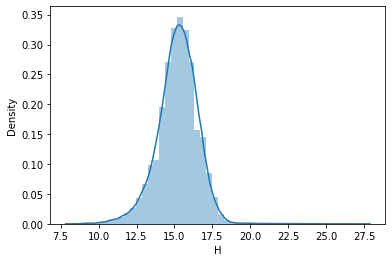

In [68]:
sns.distplot(dataset['H'].dropna())

NATURE OF GRAPH IS GUASSIAN AND NOT SKEWED SO WE WILL USE MEAN AND STD

In [69]:
uppper_boundary=dataset['H'].mean() + 3* dataset['H'].std()
lower_boundary=dataset['H'].mean() - 3* dataset['H'].std()
print(lower_boundary), print(uppper_boundary),print(dataset['H'].mean())

11.231810431700616
19.18376314686552
15.207786789283068


(None, None, None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


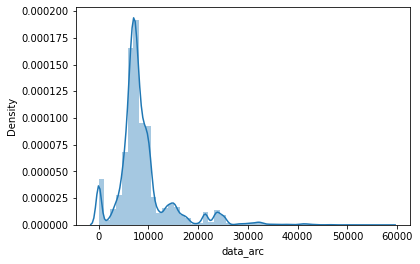

In [70]:
sns.distplot(dataset['data_arc'].dropna())

RIGHT SKEWED GRAPH, SO IQR USED

In [71]:
dataset['data_arc'].describe()

count    135645.000000
mean       8837.831326
std        5646.415202
min           1.000000
25%        6302.000000
50%        7579.000000
75%        9714.000000
max       58007.000000
Name: data_arc, dtype: float64

In [72]:
IQR=dataset.data_arc.quantile(0.75)-dataset.data_arc.quantile(0.25)
lower_bridge=dataset['data_arc'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['data_arc'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1184.0
14832.0


(None, None)

In [73]:
IQR=dataset.data_arc.quantile(0.75)-dataset.data_arc.quantile(0.25)
lower_bridge=dataset['data_arc'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['data_arc'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-3934.0
19950.0


(None, None)

In [74]:
upper_bridge=dataset['data_arc'].quantile(0.95)
print(upper_bridge)

21558.0


In [75]:
dataset=dataset[dataset['data_arc']<=35000]

In [76]:
dataset['data_arc'].describe()

count    134974.000000
mean       8677.993378
std        5178.000757
min           1.000000
25%        6297.000000
50%        7567.000000
75%        9662.750000
max       34994.000000
Name: data_arc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


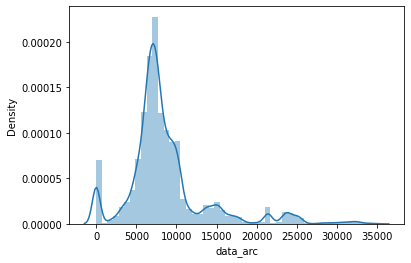

In [77]:
sns.distplot(dataset['data_arc'].dropna())

In [78]:
import scipy.stats as stat
import pylab 

In [79]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

PLOTTING DATA OF DIFFERENT COLUMNS AND APPLYING FEATURE ENGINEERING ACCORDINGLY

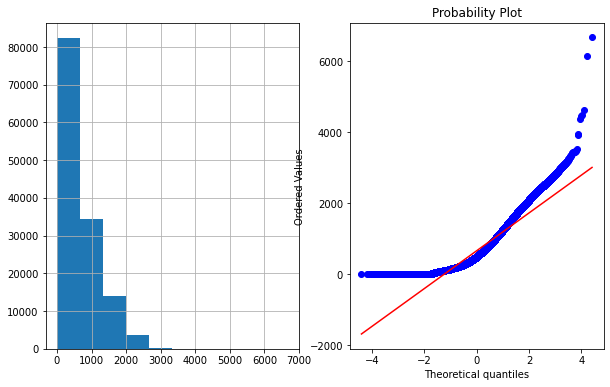

In [80]:
plot_data(dataset,'n_obs_used')

In [81]:
df=dataset

LOGARITHMIC TRANSFORMATION

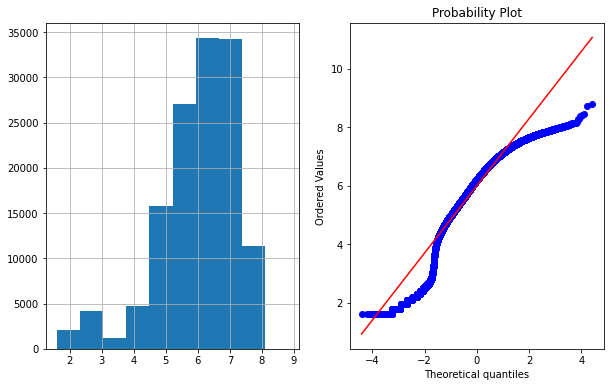

In [82]:
df['n_obs_used_log']=np.log(df['n_obs_used'])
plot_data(df,'n_obs_used_log')

In [83]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,neo,pha,diameter,albedo,moid,class,n,per,ma,n_obs_used_log
a,1.000000,0.014988,0.144930,-0.000861,-0.002853,0.320396,0.987498,0.949897,-0.027342,-0.055632,...,-0.052235,-0.030848,0.205111,-0.110504,0.323534,0.266951,-0.275388,0.949897,0.016368,-0.030889
e,0.014988,1.000000,0.145365,-0.000756,0.012690,-0.563385,0.109349,0.046063,-0.034244,-0.080954,...,0.339667,0.166516,-0.117310,-0.020083,-0.538755,-0.171787,0.189241,0.046063,-0.017401,-0.071407
i,0.144930,0.145365,1.000000,-0.013512,-0.005210,0.081016,0.137364,0.094526,-0.227405,-0.231727,...,0.101925,0.026561,0.101101,-0.088626,0.123202,0.064119,-0.110307,0.094526,0.014522,-0.279780
om,-0.000861,-0.000756,-0.013512,1.000000,-0.106952,-0.004323,-0.000177,0.000383,-0.002600,-0.025505,...,0.003661,0.000740,-0.000697,0.000505,-0.005188,-0.000651,0.008068,0.000383,-0.003259,-0.027531
w,-0.002853,0.012690,-0.005210,-0.106952,1.000000,-0.008762,-0.001511,-0.001680,-0.003843,0.012039,...,0.001053,-0.003003,0.002788,-0.003059,-0.008660,-0.001260,0.003543,-0.001680,0.001364,0.004731
q,0.320396,-0.563385,0.081016,-0.004323,-0.008762,1.000000,0.167068,0.087718,-0.033963,-0.100913,...,-0.248185,-0.131067,0.504440,-0.278586,0.996368,0.668708,-0.744233,0.087718,0.078613,-0.036345
ad,0.987498,0.109349,0.137364,-0.000177,-0.001511,0.167068,1.000000,0.974068,-0.022806,-0.041110,...,-0.013068,-0.010297,0.129541,-0.068656,0.170939,0.166570,-0.162783,0.974068,0.003954,-0.026102
per_y,0.949897,0.046063,0.094526,0.000383,-0.001680,0.087718,0.974068,1.000000,-0.009640,-0.011608,...,-0.007030,-0.004063,0.068389,-0.018886,0.089169,0.079772,-0.056940,1.000000,-0.004537,-0.007308
data_arc,-0.027342,-0.034244,-0.227405,-0.002600,-0.003843,-0.033963,-0.022806,-0.009640,1.000000,0.734218,...,-0.032979,-0.011440,0.439798,0.303490,-0.043625,0.006860,0.059475,-0.009640,-0.020676,0.683502
n_obs_used,-0.055632,-0.080954,-0.231727,-0.025505,0.012039,-0.100913,-0.041110,-0.011608,0.734218,1.000000,...,-0.022009,-0.006796,0.456118,0.479699,-0.111973,-0.056472,0.145334,-0.011608,-0.050505,0.822115


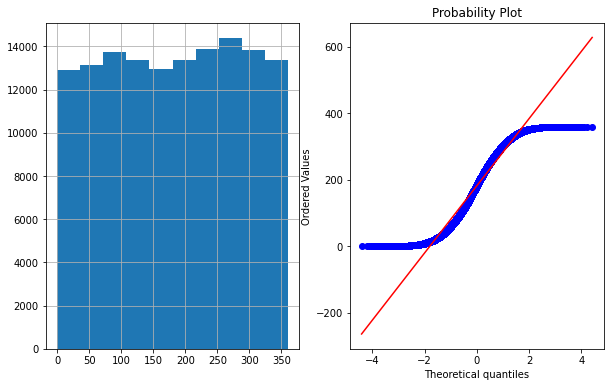

In [84]:
plot_data(dataset,'w')

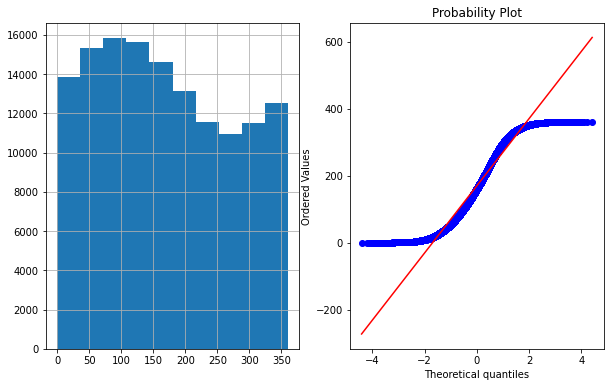

In [85]:
plot_data(dataset,'om')

AS THE GRAPHS LOOK SIMILAR, WE CAN ADD A FEATURE OF THEIR RATIO

In [86]:
df['a/ad']=(df['om'])/(df['w'])

In [87]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,pha,diameter,albedo,moid,class,n,per,ma,n_obs_used_log,a/ad
a,1.000000,0.014988,0.144930,-0.000861,-0.002853,0.320396,0.987498,0.949897,-0.027342,-0.055632,...,-0.030848,0.205111,-0.110504,0.323534,0.266951,-0.275388,0.949897,0.016368,-0.030889,-0.000966
e,0.014988,1.000000,0.145365,-0.000756,0.012690,-0.563385,0.109349,0.046063,-0.034244,-0.080954,...,0.166516,-0.117310,-0.020083,-0.538755,-0.171787,0.189241,0.046063,-0.017401,-0.071407,-0.001552
i,0.144930,0.145365,1.000000,-0.013512,-0.005210,0.081016,0.137364,0.094526,-0.227405,-0.231727,...,0.026561,0.101101,-0.088626,0.123202,0.064119,-0.110307,0.094526,0.014522,-0.279780,-0.003414
om,-0.000861,-0.000756,-0.013512,1.000000,-0.106952,-0.004323,-0.000177,0.000383,-0.002600,-0.025505,...,0.000740,-0.000697,0.000505,-0.005188,-0.000651,0.008068,0.000383,-0.003259,-0.027531,0.019780
w,-0.002853,0.012690,-0.005210,-0.106952,1.000000,-0.008762,-0.001511,-0.001680,-0.003843,0.012039,...,-0.003003,0.002788,-0.003059,-0.008660,-0.001260,0.003543,-0.001680,0.001364,0.004731,-0.034309
q,0.320396,-0.563385,0.081016,-0.004323,-0.008762,1.000000,0.167068,0.087718,-0.033963,-0.100913,...,-0.131067,0.504440,-0.278586,0.996368,0.668708,-0.744233,0.087718,0.078613,-0.036345,-0.001704
ad,0.987498,0.109349,0.137364,-0.000177,-0.001511,0.167068,1.000000,0.974068,-0.022806,-0.041110,...,-0.010297,0.129541,-0.068656,0.170939,0.166570,-0.162783,0.974068,0.003954,-0.026102,-0.000722
per_y,0.949897,0.046063,0.094526,0.000383,-0.001680,0.087718,0.974068,1.000000,-0.009640,-0.011608,...,-0.004063,0.068389,-0.018886,0.089169,0.079772,-0.056940,1.000000,-0.004537,-0.007308,-0.000209
data_arc,-0.027342,-0.034244,-0.227405,-0.002600,-0.003843,-0.033963,-0.022806,-0.009640,1.000000,0.734218,...,-0.011440,0.439798,0.303490,-0.043625,0.006860,0.059475,-0.009640,-0.020676,0.683502,-0.004334
n_obs_used,-0.055632,-0.080954,-0.231727,-0.025505,0.012039,-0.100913,-0.041110,-0.011608,0.734218,1.000000,...,-0.006796,0.456118,0.479699,-0.111973,-0.056472,0.145334,-0.011608,-0.050505,0.822115,-0.000858


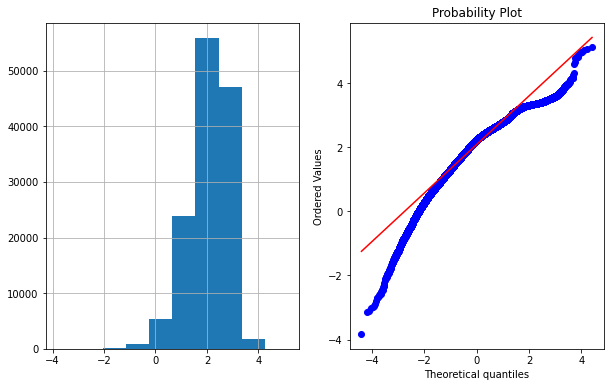

In [88]:
df['e_log']=np.log(df['i'])
plot_data(df,'e_log')

In [89]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,diameter,albedo,moid,class,n,per,ma,n_obs_used_log,a/ad,e_log
a,1.000000,0.014988,0.144930,-0.000861,-0.002853,0.320396,0.987498,0.949897,-0.027342,-0.055632,...,0.205111,-0.110504,0.323534,0.266951,-0.275388,0.949897,0.016368,-0.030889,-0.000966,0.065941
e,0.014988,1.000000,0.145365,-0.000756,0.012690,-0.563385,0.109349,0.046063,-0.034244,-0.080954,...,-0.117310,-0.020083,-0.538755,-0.171787,0.189241,0.046063,-0.017401,-0.071407,-0.001552,0.090095
i,0.144930,0.145365,1.000000,-0.013512,-0.005210,0.081016,0.137364,0.094526,-0.227405,-0.231727,...,0.101101,-0.088626,0.123202,0.064119,-0.110307,0.094526,0.014522,-0.279780,-0.003414,0.886474
om,-0.000861,-0.000756,-0.013512,1.000000,-0.106952,-0.004323,-0.000177,0.000383,-0.002600,-0.025505,...,-0.000697,0.000505,-0.005188,-0.000651,0.008068,0.000383,-0.003259,-0.027531,0.019780,-0.011845
w,-0.002853,0.012690,-0.005210,-0.106952,1.000000,-0.008762,-0.001511,-0.001680,-0.003843,0.012039,...,0.002788,-0.003059,-0.008660,-0.001260,0.003543,-0.001680,0.001364,0.004731,-0.034309,-0.002703
q,0.320396,-0.563385,0.081016,-0.004323,-0.008762,1.000000,0.167068,0.087718,-0.033963,-0.100913,...,0.504440,-0.278586,0.996368,0.668708,-0.744233,0.087718,0.078613,-0.036345,-0.001704,0.088847
ad,0.987498,0.109349,0.137364,-0.000177,-0.001511,0.167068,1.000000,0.974068,-0.022806,-0.041110,...,0.129541,-0.068656,0.170939,0.166570,-0.162783,0.974068,0.003954,-0.026102,-0.000722,0.053848
per_y,0.949897,0.046063,0.094526,0.000383,-0.001680,0.087718,0.974068,1.000000,-0.009640,-0.011608,...,0.068389,-0.018886,0.089169,0.079772,-0.056940,1.000000,-0.004537,-0.007308,-0.000209,0.024564
data_arc,-0.027342,-0.034244,-0.227405,-0.002600,-0.003843,-0.033963,-0.022806,-0.009640,1.000000,0.734218,...,0.439798,0.303490,-0.043625,0.006860,0.059475,-0.009640,-0.020676,0.683502,-0.004334,-0.232508
n_obs_used,-0.055632,-0.080954,-0.231727,-0.025505,0.012039,-0.100913,-0.041110,-0.011608,0.734218,1.000000,...,0.456118,0.479699,-0.111973,-0.056472,0.145334,-0.011608,-0.050505,0.822115,-0.000858,-0.230747


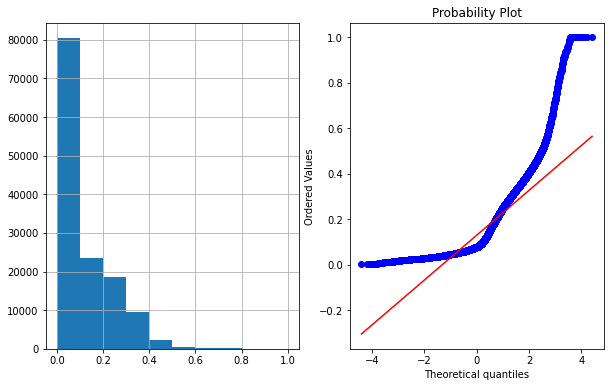

In [90]:
plot_data(df,'albedo')

SQUARE ROOT TRANSFORMATION

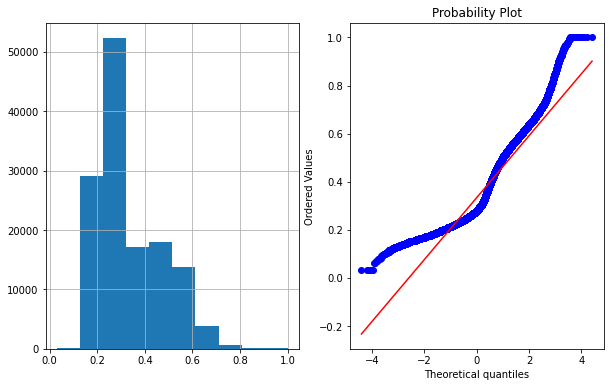

In [91]:
df['albedo_sqaure']=df.albedo**(1/2)
plot_data(df,'albedo_sqaure')

In [92]:
df.corr()['diameter']

a                 0.205111
e                -0.117310
i                 0.101101
om               -0.000697
w                 0.002788
q                 0.504440
ad                0.129541
per_y             0.068389
data_arc          0.439798
n_obs_used        0.456118
H                -0.722646
neo              -0.075739
pha              -0.040669
diameter          1.000000
albedo           -0.215648
moid              0.508903
class             0.422067
n                -0.404766
per               0.068389
ma                0.023790
n_obs_used_log    0.359622
a/ad             -0.001211
e_log             0.079090
albedo_sqaure    -0.214760
Name: diameter, dtype: float64

In [93]:
df = df.drop(["e_log"],axis=1)

In [94]:
df = df.drop(["a/ad"],axis=1)
df = df.drop(["n_obs_used_log"],axis=1)

In [95]:
df.corr()['diameter']

a                0.205111
e               -0.117310
i                0.101101
om              -0.000697
w                0.002788
q                0.504440
ad               0.129541
per_y            0.068389
data_arc         0.439798
n_obs_used       0.456118
H               -0.722646
neo             -0.075739
pha             -0.040669
diameter         1.000000
albedo          -0.215648
moid             0.508903
class            0.422067
n               -0.404766
per              0.068389
ma               0.023790
albedo_sqaure   -0.214760
Name: diameter, dtype: float64

In [96]:
df=df.assign(feature3=lambda x:(x.a)*np.sqrt(1-((x.e)**2)))

In [97]:
df.corr()['diameter']

a                0.205111
e               -0.117310
i                0.101101
om              -0.000697
w                0.002788
q                0.504440
ad               0.129541
per_y            0.068389
data_arc         0.439798
n_obs_used       0.456118
H               -0.722646
neo             -0.075739
pha             -0.040669
diameter         1.000000
albedo          -0.215648
moid             0.508903
class            0.422067
n               -0.404766
per              0.068389
ma               0.023790
albedo_sqaure   -0.214760
feature3         0.470327
Name: diameter, dtype: float64

In [98]:
dataset=df

SEPARATING VARIABLES AND OUTPUT

In [99]:
X = dataset.drop("diameter",axis=1)

In [100]:
y = dataset["diameter"]

USING STANDARD SCALER TO SCALE ALL DATA BETWEEN -3 AND 3 TO MAKE IT SYMMETRIC ABOUT 0, MAKING IT EASY FOR MODEL IMPLEMENTATION

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)

StandardScaler()

In [102]:
sd_data=sc.transform(X)
sd_data = pd.DataFrame(sd_data)
sd_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.307984,1.446014,-0.398851,0.857915,-0.997616,-1.367255,-0.093037,-0.049133,4.574757,3.238208,...,-0.077168,-0.038329,-0.555103,-1.397195,-0.205159,0.962851,-0.049133,-1.351635,-0.526231,-0.892864
1,-0.251253,-1.083786,-1.279787,0.698198,-0.288212,-0.242468,-0.221160,-0.041458,4.459461,3.932180,...,-0.077168,-0.038329,1.099972,-0.270202,-0.205159,0.710130,-0.041458,1.121998,1.229740,-0.606113
2,-0.379703,0.291596,-1.158819,-0.079231,-0.087364,-1.116567,-0.209398,-0.058638,4.747604,3.360674,...,-0.077168,-0.038329,0.790782,-1.186279,-0.205159,1.316982,-0.058638,-1.573667,0.970630,-1.001395
3,-0.046260,0.191728,-1.140800,0.780463,-1.545652,-0.204760,-0.014075,-0.012615,4.951545,3.103318,...,-0.077168,-0.038329,-0.036755,-0.277916,-0.205159,-0.043349,-0.012615,1.121559,0.153745,-0.108819
4,0.023274,1.413581,0.631120,0.775606,-0.027749,-0.582756,0.121197,-0.002449,4.223269,2.169739,...,-0.077168,-0.038329,-0.691510,-0.595182,-0.205159,-0.253488,-0.002449,-0.622664,-0.749481,-0.026366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134969,0.231115,3.689374,2.708688,-0.528136,-0.435022,-1.256660,0.449662,0.029044,-1.241409,-1.088913,...,-0.077168,-0.038329,-0.127693,-1.185657,-0.205159,-0.780294,0.029044,0.122849,0.047813,0.149685
134970,0.241299,0.177313,2.470409,1.355971,-1.565995,0.557814,0.158324,0.030629,-1.217655,-1.083588,...,-0.077168,-0.038329,-0.991606,0.518685,-0.205159,-0.802815,0.030629,-0.174481,-1.393934,0.657495
134971,-0.174615,-0.898043,0.189396,0.745104,-0.113978,-0.093933,-0.166111,-0.030876,-1.039207,-1.113761,...,-0.077168,-0.038329,-0.627853,-0.104467,-0.205159,0.401827,-0.030876,-0.364843,-0.641886,-0.404425
134972,0.161237,1.839021,0.610655,1.695603,1.552252,-0.470517,0.246114,0.018274,-1.249520,-1.124410,...,-0.077168,-0.038329,-0.527821,-0.527004,-0.205159,-0.618120,0.018274,-0.070892,-0.484603,0.282517


SPLITTING THE DATA INTO TRAIN, VALIDATION AND TEST DATA

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,shuffle=True)

READY FOR MODEL TESTING!

In [104]:
from xgboost import XGBRegressor

USING DEFAULT PARAMETERS

In [105]:
model = XGBRegressor()

In [106]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True)

[04:52:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.28347	validation_1-rmse:5.30964
[1]	validation_0-rmse:4.8081	validation_1-rmse:4.83407
[2]	validation_0-rmse:4.37696	validation_1-rmse:4.40003
[3]	validation_0-rmse:3.98888	validation_1-rmse:4.01503
[4]	validation_0-rmse:3.64201	validation_1-rmse:3.6671
[5]	validation_0-rmse:3.33273	validation_1-rmse:3.36066
[6]	validation_0-rmse:3.04779	validation_1-rmse:3.07001
[7]	validation_0-rmse:2.79562	validation_1-rmse:2.81773
[8]	validation_0-rmse:2.57286	validation_1-rmse:2.59248
[9]	validation_0-rmse:2.36544	validation_1-rmse:2.38499
[10]	validation_0-rmse:2.18525	validation_1-rmse:2.20741
[11]	validation_0-rmse:2.02083	validation_1-rmse:2.04183
[12]	validation_0-rmse:1.87168	validation_1-rmse:1.89116
[13]	validation_0-rmse:1.74094	validation_1-rmse:1.76018
[14]	validation_0-rmse:1.6221	validation_1-rmse:1.64302
[15]	validation_0-rmse:1.51473	

XGBRegressor()

In [107]:
pred =  model.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(pred,y_test)

0.37987831216201784

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(pred,y_test)

0.9714465433031952

CHANGING PARAMETERS

In [112]:
model2 = XGBRegressor(learning_rate=0.05)

In [113]:
model2.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True)

[04:53:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.54874	validation_1-rmse:5.57424
[1]	validation_0-rmse:5.29577	validation_1-rmse:5.32031
[2]	validation_0-rmse:5.05681	validation_1-rmse:5.08164
[3]	validation_0-rmse:4.82889	validation_1-rmse:4.85313
[4]	validation_0-rmse:4.61111	validation_1-rmse:4.63422
[5]	validation_0-rmse:4.40635	validation_1-rmse:4.42966
[6]	validation_0-rmse:4.2112	validation_1-rmse:4.23549
[7]	validation_0-rmse:4.0269	validation_1-rmse:4.053
[8]	validation_0-rmse:3.84953	validation_1-rmse:3.87368
[9]	validation_0-rmse:3.68343	validation_1-rmse:3.70878
[10]	validation_0-rmse:3.52583	validation_1-rmse:3.54983
[11]	validation_0-rmse:3.37298	validation_1-rmse:3.39477
[12]	validation_0-rmse:3.23148	validation_1-rmse:3.2545
[13]	validation_0-rmse:3.09356	validation_1-rmse:3.11372
[14]	validation_0-rmse:2.9655	validation_1-rmse:2.98559
[15]	validation_0-rmse:2.8414	vali

XGBRegressor(learning_rate=0.05)

In [114]:
pred2 =  model2.predict(X_test)

In [115]:
mean_squared_error(pred2,y_test)

0.428765167905249

In [116]:
r2_score(pred2,y_test)

0.965754000551459

NEARLY CONSTANT SCORE

# Week4 DNNTest and Other Models

Using SVM  

In [117]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [118]:
pred3 = svr.predict(X_test)

In [119]:
mean_squared_error(pred3,y_test)

4.675411966738147

In [120]:
r2_score(pred3,y_test)

0.2796477557030973

USING DECISION TREE

In [121]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [122]:
pred4 = regressor.predict(X_test)

In [123]:
mean_squared_error(pred4,y_test)

0.7429376005334123

In [124]:
r2_score(pred4,y_test)

0.9461059896463943

BAGGING

In [125]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100, random_state=0,max_samples=0.8,oob_score=True,verbose=1)
regr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min finished


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=100, oob_score=True, random_state=0, verbose=1)

In [126]:
regr.oob_score_

0.9726535745931612

In [127]:
pred5 = regr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


In [128]:
mean_squared_error(pred5,y_test)

0.3784571308069863

In [129]:
r2_score(pred5,y_test)

0.9718509972922237

This was the best score till now!

USING GRADIENT BOOSTING

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
reg2 = GradientBoostingRegressor(random_state=0)
reg2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [131]:
pred6 = reg2.predict(X_test)

In [132]:
mean_squared_error(pred6,y_test)

0.3769997348526466

In [133]:
r2_score(pred6,y_test)

0.9716390337691762

USING DNN MODEL USING KERAS API

In [134]:
from tensorflow import keras

In [135]:
def build_model(n_h=1,n_n=30,lr=3e-3,input_shape=X_train.shape[1:]):
    ann = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_h):
        ann.add(keras.layers.Dense(n_n, activation="relu", **options))
        options = {}
    ann.add(keras.layers.Dense(1,activation="linear", **options))
    lr_adp = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lr,decay_steps=100,decay_rate=0.9)
    optimizer1 = keras.optimizers.SGD(lr_adp,momentum=0.9)
    ann.compile(loss='mean_absolute_error', optimizer=optimizer1, metrics=['mean_absolute_error'])
    return ann

In [136]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [137]:
keras_reg.fit(X_train,y_train,epochs=100,
             validation_data=(X_valid,y_valid))

Epoch 1/100
3375/3375 [==============================] - 8s 2ms/step - loss: 468.5776 - mean_absolute_error: 468.5776 - val_loss: 2.1836 - val_mean_absolute_error: 2.1836
Epoch 2/100
3375/3375 [==============================] - 7s 2ms/step - loss: 2.1730 - mean_absolute_error: 2.1730 - val_loss: 2.1836 - val_mean_absolute_error: 2.1836
Epoch 3/100
3375/3375 [==============================] - 7s 2ms/step - loss: 2.1724 - mean_absolute_error: 2.1724 - val_loss: 2.1836 - val_mean_absolute_error: 2.1836
Epoch 4/100
3375/3375 [==============================] - 7s 2ms/step - loss: 2.1724 - mean_absolute_error: 2.1724 - val_loss: 2.1836 - val_mean_absolute_error: 2.1836
Epoch 5/100
3375/3375 [==============================] - 7s 2ms/step - loss: 2.1724 - mean_absolute_error: 2.1724 - val_loss: 2.1836 - val_mean_absolute_error: 2.1836
Epoch 6/100
3375/3375 [==============================] - 7s 2ms/step - loss: 2.1724 - mean_absolute_error: 2.1724 - val_loss: 2.1836 - val_mean_absolute_error: 2

In [138]:
pred7 = keras_reg.predict(X_test)

422/422 [==============================] - 1s 1ms/step


In [139]:
mean_squared_error(pred7,y_test)

14.518711726216111

In [140]:
r2_score(pred7,y_test)

-255415877812837.0

This one got highly Overtrained!

USING GRID-SEARCH-CV ON BAGGING REGRESSOR MODEL AS IT GAVE BEST RESULTS TILL NOW

In [141]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[90, 110]}
clf = GridSearchCV(regr, parameters)

In [142]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        max_samples=0.8, n_estimators=100,
                                        oob_score=True, random_state=0,
                                        verbose=1),
             param_grid={'n_estimators': [90, 110]})

In [143]:
clf.best_params_

{'n_estimators': 110}

MAKING FINAL MODEL

In [144]:
final_model = clf.best_estimator_

In [145]:
pred8 = final_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [146]:
mean_squared_error(pred8,y_test)

0.377438300492629

In [147]:
r2_score(pred8,y_test)

0.971944163857226

Best Score till now!

In [148]:
print(r2_score(pred,y_test))
print(r2_score(pred2,y_test))
print(r2_score(pred3,y_test))
print(r2_score(pred4,y_test))
print(r2_score(pred5,y_test))
print(r2_score(pred6,y_test))
print(r2_score(pred7,y_test))
print(r2_score(pred8,y_test))

0.9714465433031952
0.965754000551459
0.2796477557030973
0.9461059896463943
0.9718509972922237
0.9716390337691762
-255415877812837.0
0.971944163857226


Hence, we have got our "final_model" as the best model with highest score!

**FINAL R2_SCORE OF FINAL MODEL = 0.971944163857226**
